In [101]:
# Maxim Chowdhury
# Dr. Staib

In [102]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import History 
from random import randint
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage.util import random_noise
import matplotlib.pyplot as pp
%matplotlib inline

In [103]:
NUM_SQUARES = 200
X_train = []
for i in range(NUM_SQUARES):
    exp =np.zeros((28, 28))
    x_start = randint(0,27)
    x_end = randint(x_start, 28)
    y_start = randint(0, 27)
    y_end = randint(y_start, 28)
    for x in range(y_start, y_end):
        for y in range(y_start, y_end):
            exp[x, y] = 1
    if randint(0, 1) == 0: # sometie true
        exp = np.fliplr(exp)
    X_train.append(exp)

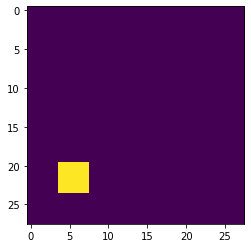

In [104]:
plt.imshow(X_train[1])

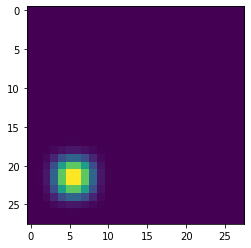

In [105]:
# adding blur
plt.imshow(gaussian(X_train[1], sigma=1))

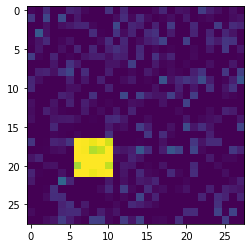

In [106]:
# adding random noise
plt.imshow(random_noise(X_train[5]))

In [107]:
for i in range(NUM_SQUARES):
    x = np.arange(0, 28)
    y = np.arange(0, 28)
    arr = np.zeros((y.size, x.size))

    cx = randint(0, 28)
    cy = randint(0, 28)
    r = randint(0, 14)

    # The two lines below could be merged, but I stored the mask
    # for code clarity.
    mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
    arr[mask] = 1
    if randint(0, 1) == 0: # sometie true
        arr = np.fliplr(arr)
    X_train.append(arr)
    


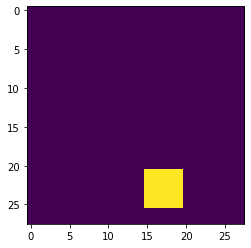

In [108]:
plt.imshow(X_train[300])

In [109]:
X_train = np.array(X_train)
X_train.shape

(400, 28, 28)

In [110]:
Y_train = np.array([1 if i<200 else 0 for i in range(400)])
Y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
shuffler = np.random.permutation(NUM_SQUARES*2)
X_train = X_train[shuffler]
Y_train = Y_train[shuffler]

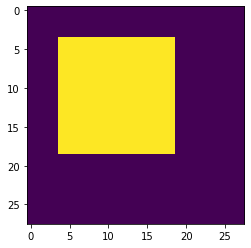

In [112]:
plt.imshow(X_train[100])

In [113]:
label = Y_train[100]
if label == 0:
    print('circle!')
else:
    print('Square!')

Square!


In [114]:
# make training and testing data
NUM_TRAIN =360
X_test = X_train[NUM_TRAIN:]
Y_test = Y_train[NUM_TRAIN:]
X_train = X_train[:NUM_TRAIN]
Y_train = Y_train[:NUM_TRAIN]

In [115]:
X_train.shape

(360, 28, 28)

In [116]:
# flatten 
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [117]:
X_train_flattened.shape

(360, 784)

In [118]:
model = keras.Sequential([
    keras.layers.Dense(2, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=10)

Epoch 1/10
12/12 [==============================] - 0s 907us/step - loss: 0.6877 - accuracy: 0.5500
Epoch 2/10
12/12 [==============================] - 0s 874us/step - loss: 0.6388 - accuracy: 0.6472
Epoch 3/10
12/12 [==============================] - 0s 816us/step - loss: 0.6027 - accuracy: 0.7056
Epoch 4/10
12/12 [==============================] - 0s 816us/step - loss: 0.5800 - accuracy: 0.7361
Epoch 5/10
12/12 [==============================] - 0s 1ms/step - loss: 0.5570 - accuracy: 0.7444
Epoch 6/10
12/12 [==============================] - 0s 906us/step - loss: 0.5420 - accuracy: 0.7667
Epoch 7/10
12/12 [==============================] - 0s 906us/step - loss: 0.5308 - accuracy: 0.7750
Epoch 8/10
12/12 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.7806
Epoch 9/10
12/12 [==============================] - 0s 997us/step - loss: 0.5106 - accuracy: 0.7889
Epoch 10/10
12/12 [==============================] - 0s 907us/step - loss: 0.5008 - accuracy: 0.8000


In [119]:
y_predicted = model.predict(X_test_flattened)

In [120]:
np.argmax(y_predicted[5])

1

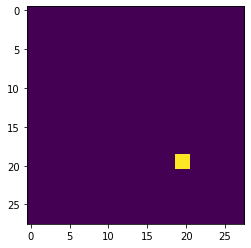

In [121]:
plt.imshow(X_test[5])

In [122]:
# adding a hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=20)

Epoch 1/20
12/12 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6361
Epoch 2/20
12/12 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.8028
Epoch 3/20
12/12 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8583
Epoch 4/20
12/12 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8583
Epoch 5/20
12/12 [==============================] - 0s 988us/step - loss: 0.3534 - accuracy: 0.8750
Epoch 6/20
12/12 [==============================] - 0s 1ms/step - loss: 0.3265 - accuracy: 0.8667
Epoch 7/20
12/12 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8639
Epoch 8/20
12/12 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8889
Epoch 9/20
12/12 [==============================] - 0s 1ms/step - loss: 0.2915 - accuracy: 0.8861
Epoch 10/20
12/12 [==============================] - 0s 1ms/step - loss: 0.2744 - accuracy: 0.8917
Epoch 11/20
12/12

In [123]:
# adding 2nd hidden layer 
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
12/12 [==============================] - 0s 2ms/step - loss: 0.7351 - accuracy: 0.5806
Epoch 2/5
12/12 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.8028
Epoch 3/5
12/12 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.8194
Epoch 4/5
12/12 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.8389
Epoch 5/5
12/12 [==============================] - 0s 1ms/step - loss: 0.3112 - accuracy: 0.8694


In [124]:
# adding 2nd hidden layer 
history = History()
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=20)

Epoch 1/20
12/12 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.6333
Epoch 2/20
12/12 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.7861
Epoch 3/20
12/12 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.8306
Epoch 4/20
12/12 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8639
Epoch 5/20
12/12 [==============================] - 0s 1ms/step - loss: 0.2859 - accuracy: 0.8806
Epoch 6/20
12/12 [==============================] - 0s 1ms/step - loss: 0.2424 - accuracy: 0.8972
Epoch 7/20
12/12 [==============================] - 0s 1ms/step - loss: 0.2132 - accuracy: 0.9000
Epoch 8/20
12/12 [==============================] - 0s 1ms/step - loss: 0.1758 - accuracy: 0.9417
Epoch 9/20
12/12 [==============================] - 0s 1ms/step - loss: 0.1440 - accuracy: 0.9583
Epoch 10/20
12/12 [==============================] - 0s 1ms/step - loss: 0.1199 - accuracy: 0.9583
Epoch 11/20
12/12 [

In [125]:
X_train_new = []
# make blurrred and noisy images
for x in X_train:
    X_train_new.append(gaussian(x, sigma=0.5))
    X_train_new.append(random_noise(x))
len(X_train_new)

720